# Research Question No. 3

## How frequent are, and what are the main characteristics of long-lived bugs in WineHQ project?

## Experimental parameters


| Project                    |         #Reports     |       #Thesholds     |
|----------------------------|:--------------------:|:--------------------:|
| Eclipse                    |        10000         |         365          |
| WineHQ                     |        10000         |         365          |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## Step1. Setup experimental environment.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 

# Setup Matplotlib
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')
%matplotlib inline 

# Setup Seaborn
sns.set_context("paper")
sns.set_style("ticks")

metrics_e1_path = "datasets/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv"
print("Setup complete")

Setup complete


## Step 2. Load data.

In [6]:
    !echo "\nHeader of metrics file $metrics_e1_path"
    !head -n 2 $metrics_e1_path

    !echo "\nNumber of lines in the file $metrics_e1_path"
    !wc -l $metrics_e1_path



Header of metrics file datasets/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv
project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fp,tn,fn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
eclipse,long_description,100,knn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,85,950,1271,102,0.45454545454545453,0.5722647456100856,0.5134051000777701,0.5134051000777701,0.9257101238164603,0.5722647456100856,0.7072899276572064

Number of lines in the file datasets/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv
42 datasets/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv


In [7]:
# read metrics data.
metrics_e1_data = pd.read_csv(metrics_e1_path)
rows_and_cols = metrics_e1_data.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {metrics_e1_path}.\n")

There are 41 rows and 25 columns in datasets/20190918180550_rq3e1_eclipse_predict_long_lived_metrics.csv.



## Step 3. Review the data

In [16]:
metrics_e1_data.head(42)

,project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,...,fp,tn,fn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
0,eclipse,long_description,100,knn,smote,repeatedcv,Accuracy,365,12847,6665,...,950,1271,102,0.454545,0.572265,0.513405,0.513405,0.925710,0.572265,0.707290
1,eclipse,long_description,100,knn,smote,repeatedcv,Kappa,365,12847,6665,...,950,1271,102,0.454545,0.572265,0.513405,0.513405,0.925710,0.572265,0.707290
2,eclipse,long_description,100,knn,smote,repeatedcv,ROC,365,12847,6665,...,1227,994,75,0.598930,0.447546,0.523238,0.523238,0.929841,0.447546,0.604255
3,eclipse,long_description,100,knn,unbalanced,repeatedcv,Accuracy,365,7227,6665,...,0,2221,187,0.000000,1.000000,0.500000,0.500000,0.922342,1.000000,0.959603
4,eclipse,long_description,100,knn,unbalanced,repeatedcv,Kappa,365,7227,6665,...,0,2221,187,0.000000,1.000000,0.500000,0.500000,0.922342,1.000000,0.959603
5,eclipse,long_description,100,knn,unbalanced,repeatedcv,ROC,365,7227,6665,...,0,2221,187,0.000000,1.000000,0.500000,0.500000,0.922342,1.000000,0.959603
6,eclipse,long_description,100,nb,smote,repeatedcv,Accuracy,365,12847,6665,...,1165,1056,84,0.550802,0.475462,0.513132,0.513132,0.926316,0.475462,0.628384
7,eclipse,long_description,100,nb,smote,repeatedcv,Kappa,365,12847,6665,...,1165,1056,84,0.550802,0.475462,0.513132,0.513132,0.926316,0.475462,0.628384
8,eclipse,long_description,100,nb,smote,repeatedcv,ROC,365,12847,6665,...,1165,1056,84,0.550802,0.475462,0.513132,0.513132,0.926316,0.475462,0.628384
9,eclipse,long_description,100,nb,unbalanced,repeatedcv,Accuracy,365,7227,6665,...,0,2221,187,0.000000,1.000000,0.500000,0.500000,0.922342,1.000000,0.959603


In [15]:
metrics_e1_data[['sensitivity', 'specificity', 'balanced_acc', 'precision', 'recall', 'fmeasure']].describe()

,sensitivity,specificity,balanced_acc,precision,recall,fmeasure
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.233594,0.789177,0.511386,0.925157,0.789177,0.823548
std,0.273110,0.259797,0.013270,0.003904,0.259797,0.193325
min,0.000000,0.016427,0.498954,0.914286,0.016427,0.032274
25%,0.000000,0.572265,0.500000,0.922342,0.572265,0.707290
50%,0.085561,0.954075,0.505039,0.923734,0.954075,0.940315
75%,0.454545,1.000000,0.522695,0.926947,1.000000,0.959603
max,0.981481,1.000000,0.542158,0.936170,1.000000,0.960079


<Figure size 432x288 with 0 Axes>

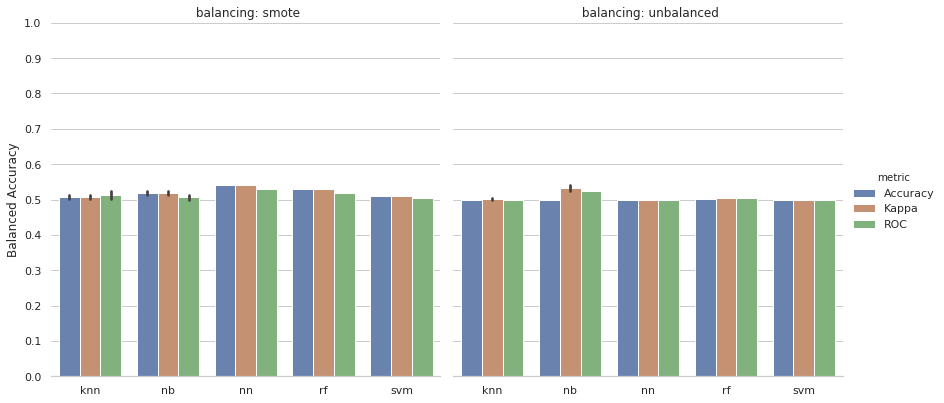

In [65]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=metrics_e1_data
                , kind="bar"
                , x="classifier"
                , y="balanced_acc"
                , hue="metric"
                , col="balancing"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Balanced Accuracy")
  .set_titles(" {col_var}: {col_name}")
  .set(yticks=np.arange(0, 1.1, 0.1))
  .set(ylim=(0, 1))
  .despine(left=True))

<Figure size 432x288 with 0 Axes>

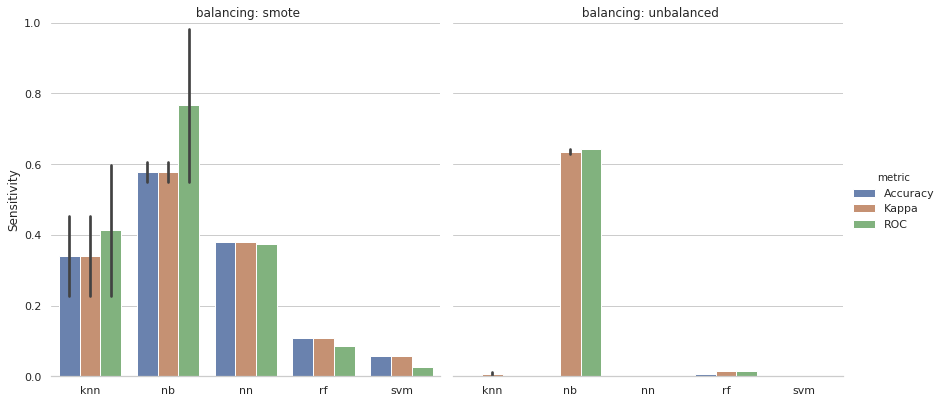

In [56]:
sns.despine(offset=5)
sns.set(style="whitegrid")
#g = sns.FacetGrid(metrics_e1_data, col="balancing", despine=True)
g = sns.catplot(data=metrics_e1_data
                , kind="bar"
                , x="classifier"
                , y="sensitivity"
                , hue="metric"
                , col="balancing"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Sensitivity")
  .set_titles(" {col_var}: {col_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

<Figure size 432x288 with 0 Axes>

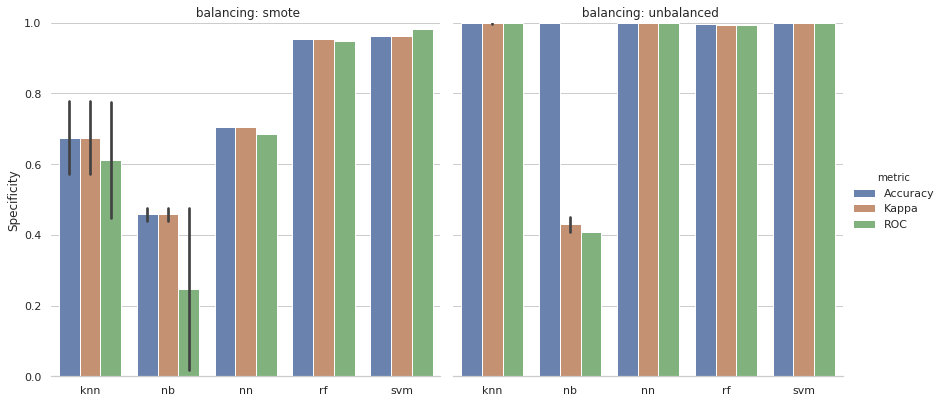

In [57]:
sns.despine(offset=5)
sns.set(style="whitegrid")
#g = sns.FacetGrid(metrics_e1_data, col="balancing", despine=True)
g = sns.catplot(data=metrics_e1_data
                , kind="bar"
                , x="classifier"
                , y="specificity"
                , hue="metric"
                , col="balancing"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Specificity")
  .set_titles(" {col_var}: {col_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

<Figure size 432x288 with 0 Axes>

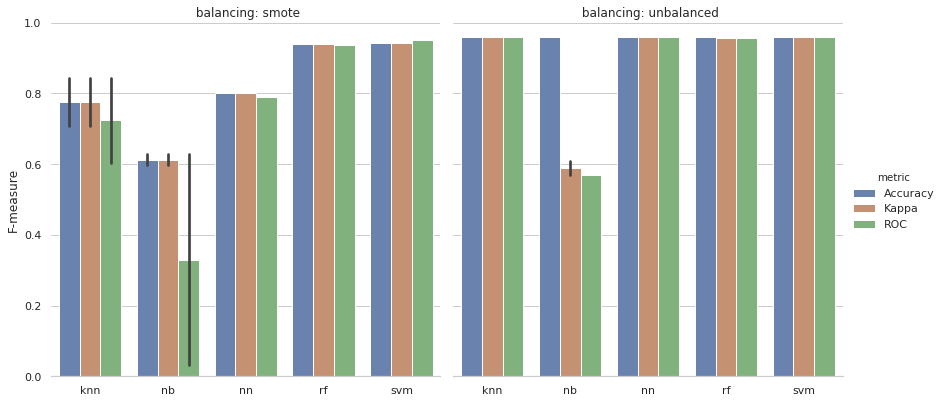

In [69]:
sns.despine(offset=5)
sns.set(style="whitegrid")
#g = sns.FacetGrid(metrics_e1_data, col="balancing", despine=True)
g = sns.catplot(data=metrics_e1_data
                , kind="bar"
                , x="classifier"
                , y="fmeasure"
                , hue="metric"
                , col="balancing"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "F-measure")
  .set_titles(" {col_var}: {col_name}")
  .set(ylim=(0, 1))
  .despine(left=True))